In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

In [3]:
df = pd.read_csv("C:/Users/makeup/Desktop/AI-class-main/diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


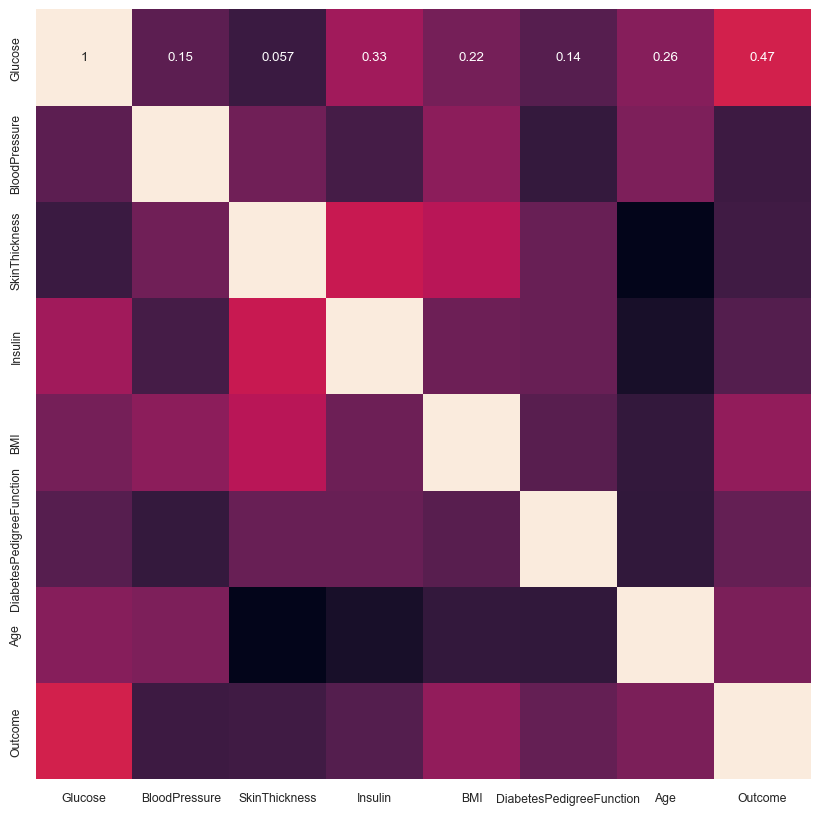

In [4]:
df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
X = df.drop('Glucose',axis=1)
X.head()

,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,
6,72,35,0,33.6,0.627,50,1
1,66,29,0,26.6,0.351,31,0
8,64,0,0,23.3,0.672,32,1
1,66,23,94,28.1,0.167,21,0
0,40,35,168,43.1,2.288,33,1


In [7]:
y = df['Glucose']
y.head()

Pregnancies
6    148
1     85
8    183
1     89
0    137
Name: Glucose, dtype: int64

In [8]:
Y = pd.get_dummies(y).values

In [9]:
X = X.values

In [10]:
X

array([[ 72.   ,  35.   ,   0.   , ...,   0.627,  50.   ,   1.   ],
       [ 66.   ,  29.   ,   0.   , ...,   0.351,  31.   ,   0.   ],
       [ 64.   ,   0.   ,   0.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [ 72.   ,  23.   , 112.   , ...,   0.245,  30.   ,   0.   ],
       [ 60.   ,   0.   ,   0.   , ...,   0.349,  47.   ,   1.   ],
       [ 70.   ,  31.   ,   0.   , ...,   0.315,  23.   ,   0.   ]])

In [11]:
y

Pregnancies
6     148
1      85
8     183
1      89
0     137
     ... 
10    101
2     122
5     121
1     126
1      93
Name: Glucose, Length: 768, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [13]:

X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((614, 7), (614, 136), (154, 7), (154, 136))

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(7,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 64        
                                                                 
 dense_1 (Dense)             (None, 30)                270       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1295 (5.06 KB)
Trainable params: 1295 (5.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10


20/20 [==============================] - 1s 10ms/step - loss: 0.0921 - mse: 0.0921 - val_loss: 0.0188 - val_mse: 0.0188
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0129 - val_mse: 0.0129
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0099 - mse: 0.0099 - val_loss: 0.0097 - val_mse: 0.0097
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0094 - mse: 0.0094 - val_loss: 0.0092 - val_mse: 0.0092
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0089 - mse: 0.0089 - val_loss: 0.0094 - val_mse: 0.0094
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0092 - mse: 0.0092 - val_loss: 0.0082 - val_mse: 0.0082
Epoch 8/10
20/20 [==============================] - 0s 3ms/step - loss: 0.0087 - mse: 0

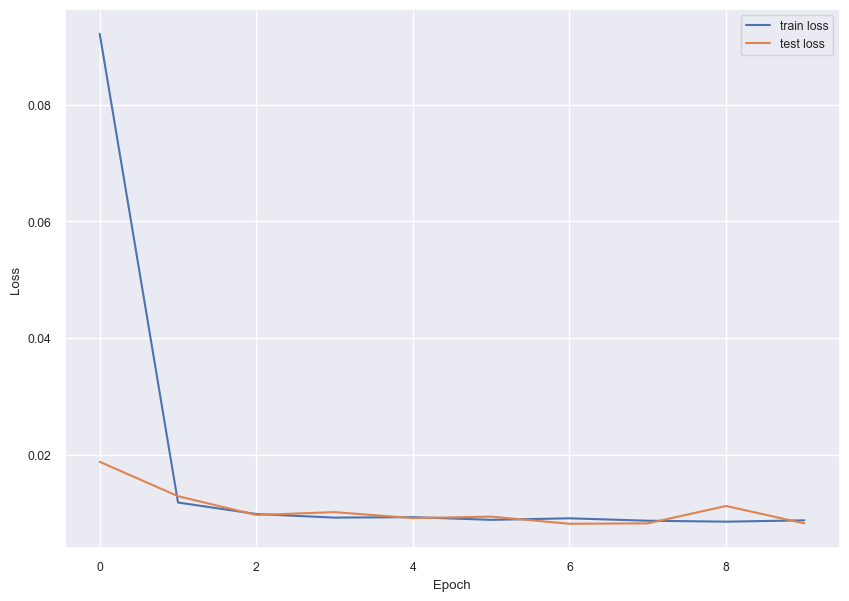

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [17]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 5ms/step - loss: 0.0083 - mse: 0.0083


[0.008289994671940804, 0.008289994671940804]